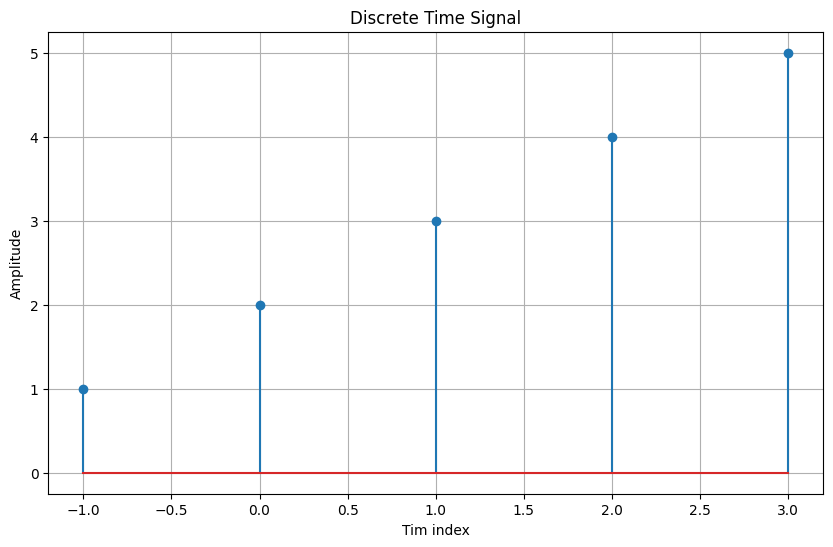

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = np.array([0, 1, 2, 3, 4])
x = np.array([1, 2, 3 , 4, 5])

plt.figure(figsize=(10, 6))
plt.stem(n -1 , x)
plt.xlabel('Tim index')
plt.ylabel('Amplitude')
plt.title('Discrete Time Signal')
plt.grid(True)
plt.show()

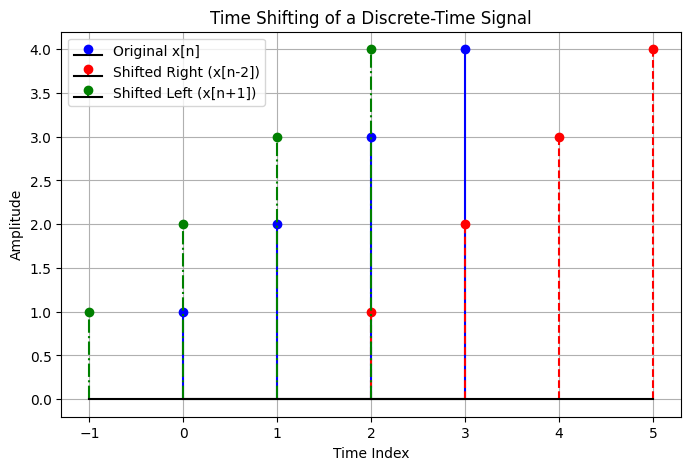

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original discrete-time signal
n = np.array([0, 1, 2, 3])  # Time indices
x = np.array([1, 2, 3, 4])  # Signal values

# Define shift amounts
shift_right = 2
shift_left = -1

# Perform shifting
n_right = n + shift_right  # Shift right
n_left = n + shift_left  # Shift left

# Plot original and shifted signals
plt.figure(figsize=(8, 5))

plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt="k", label='Original x[n]')
plt.stem(n_right, x, linefmt='r--', markerfmt='ro', basefmt="k", label='Shifted Right (x[n-2])')
plt.stem(n_left, x, linefmt='g-.', markerfmt='go', basefmt="k", label='Shifted Left (x[n+1])')

plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.title('Time Shifting of a Discrete-Time Signal')
plt.legend()
plt.grid()
plt.show()


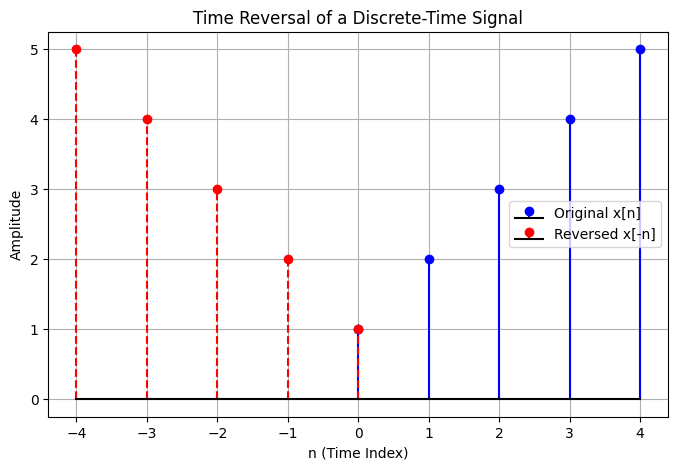

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original discrete time signal
n = np.array([0, 1, 2, 3, 4])  # Time indices
x = np.array([1, 2, 3, 4, 5])  # Signal values

# Time reversal
n_reversed = -n[::-1]  # Reverse the time indices
x_reversed = x[::-1]    # Reverse the signal values


plt.figure(figsize=(8, 5))
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt="k", label='Original x[n]')
plt.stem(n_reversed, x_reversed, linefmt='r--', markerfmt='ro', basefmt="k", label='Reversed x[-n]')
plt.xlabel('n (Time Index)')
plt.ylabel('Amplitude')
plt.title('Time Reversal of a Discrete-Time Signal')
plt.legend()
plt.grid()
plt.show()


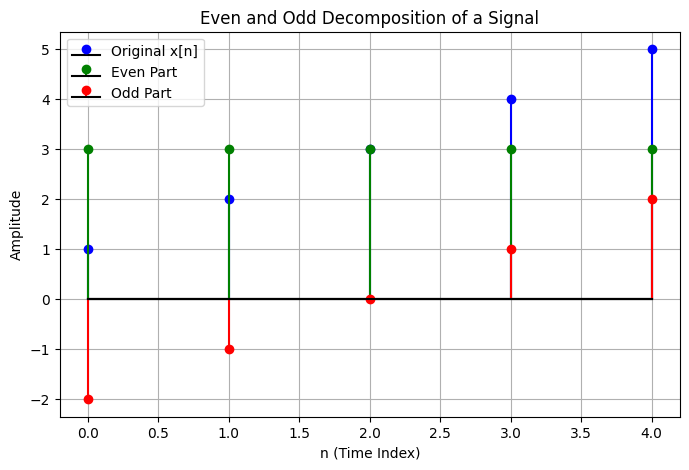

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original discrete-time signal
n = np.array([0, 1, 2, 3, 4])  # Time indices
x = np.array([1, 2, 3, 4, 5])  # Signal values

# Compute even and odd parts
x_reversed = x[::-1]
even_part = 0.5 * (x + x_reversed)
odd_part = 0.5 * (x - x_reversed)

# Plot original, even, and odd signals
plt.figure(figsize=(8, 5))

plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt="k", label='Original x[n]')
plt.stem(n, even_part, linefmt='g-', markerfmt='go', basefmt="k", label='Even Part')
plt.stem(n, odd_part, linefmt='r-', markerfmt='ro', basefmt="k", label='Odd Part')

plt.xlabel('n (Time Index)')
plt.ylabel('Amplitude')
plt.title('Even and Odd Decomposition of a Signal')
plt.legend()
plt.grid()
plt.show()


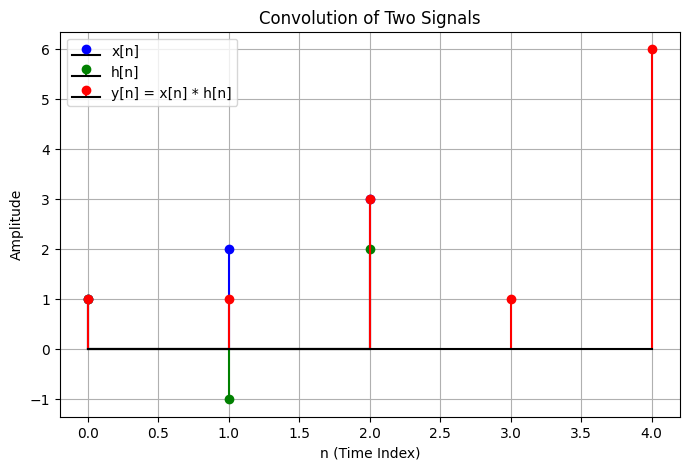

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two discrete-time signals
x = np.array([1, 2, 3])
h = np.array([1, -1, 2])

# Compute convolution
y = np.convolve(x, h)

# Define time indices
n_x = np.arange(len(x))
n_h = np.arange(len(h))
n_y = np.arange(len(y))

# Plot signals
plt.figure(figsize=(8, 5))
plt.stem(n_x, x, linefmt='b-', markerfmt='bo', basefmt="k", label='x[n]')
plt.stem(n_h, h, linefmt='g-', markerfmt='go', basefmt="k", label='h[n]')
plt.stem(n_y, y, linefmt='r-', markerfmt='ro', basefmt="k", label='y[n] = x[n] * h[n]')

plt.xlabel('n (Time Index)')
plt.ylabel('Amplitude')
plt.title('Convolution of Two Signals')
plt.legend()
plt.grid()
plt.show()
